# Pymaceuticals Inc.
---

### Analysis

- Overall Conclusion: Capomulin and Ramican appear to be the most promising regimens for treating squamous cell carcinoma (SCC). These regimens had the best mortality rate and the lowest average tumor volume upon conclusion of the study.


Part 1: Summary Statistics
Descriptive statistics (mean tumor volume, median tumor volume, tumor volume variance, tumor volume standard deviation, and tumor volume standard error) were calculated for all drug regimens
Results:
1.	Capomulin and Ramicane had the lowest mean tumor volume
2.	Ketapril and Naftisol had the greatest mean tumor volume – both of which were higher than that of the placebo.
3.	Capomulin and Ramicane had the lowest variance in tumor volume and the lowest tumor volume standard error. This suggests that the true tumor volume is fairly accurately represented by those of the samples. Conversely, Ketapril and Naftisol had the highest variance in tumor volume and tumor volume standard error.

Conclusion:
The descriptive statistics indicate that among the regimens studied, Capomulin and Ramicane appear to be the most promising drugs for treating SCC. Ketapril and Naftisol appear to be the least effective drugs for treating SCC. There isn’t sufficient data to conclude whether these two regimens exacerbate SCC, however.

Part 2: Data Visualization – Bar and Pie Charts
First, a bar chart was created to display the number of observed mouse timepoints for each regimen. A timepoint is the day measurements were taken, and were spaced at 5-day intervals, e.g. 0, 5,…, 45. Presumably, measurements were taken over the entire period so long as the subject mouse was a participant (synonymous with “alive”).
Results:
1.	The Capomulin and Ramicane regimens concluded the study with the greatest number of observed mouse timepoints, both eclipsing the regimens with the next greatest number of observed mouse timepoints: Ketapril and Natfisol.
2.	The number of observed mouse time points for Ketapril, Naftisol, Zoniferol, Stelasyn, Infubinol, and Ceftamin were nearly identical.
3.	Propriva had the least number of observed mouse timepoints.
Conclusion:
The number of observed mouse timepoints is a proxy for mortality rates. The data suggests that Propriva has the greatest mortality rate and other then Capomulin and Ramicane, the mortality rates of the other regimens aren’t materially better than the mortality rate of the placebo.

Second, a pie chart was created to show the proportion by gender of the study mice. Ideally, an equal proportion of each gender would be used and the results for each gender should be evaluated (though that was not part of this analysis). Of particular interest is the results by gender – if there are statistically significant differences, further analysis and testing would be warranted.
Conclusion:
The distribution of gender was nearly equal: 51% male, 49% female.

Part 3: Data Visualization – Quartiles, Outliers and Boxplots
The final tumor volume of each mouse across four of the treatment regimens (Capomulin, Ramicane, Infubinol, and Ceftamin). These boxplots convey intra-regimen information (the mean, the interquartile range, outliers, etc.) but when plotted in the same figure, they convey inter-regimen information
1.	Only Infubinol had an outlier, a lone tumor volume that was below the lower bound.
2.	Capomulin and Ramicane displayed nearly identical results: The mean values of each were nearly the same, and much less than those of Infubinol and Ceftamin; their interquartile ranges were not as broad as those of Infubinol and Ceftamin.
Conclusion:
The boxplots clearly show that Capomulin and Ramicane had outcomes in terms of mean values, dispersion, and outliers that were far superior to those of Infubinol and Ceftamin

Part 4: Data Visualization – Line and Scatterplot
A line plot was generated for only one subject, mouse l509, who was in the Caomulin regimen. The plot shows that this subject’s tumor increased in volume substantially from t0 to t20. However, from t20 through the end of the study, the tumor volume decreased precipitously.

Conclusion: At least for this subject, Capomulin had a nontrivial, positive impact on SCC!

Data visualization concluded with a scatter plot and a regression. The scatter plot was useful to see the distribution of tumor volume by weight, and thereby enabling us to make general observations: Is there any correlation between volume and weight? Are measurements clustered?
1.	The scatter plot indicates that as weight increases, average tumor volume increases (positive correlation).
2.	The correlation coefficient, 0.84, supports this observation.
3.	The regression line through the data provides a fairly accurate predictor of average tumor volume, at least for the range of weights observed (12g – 26g). We cannot draw conclusions about average tumor volume outside of the observed range.


Overview of Source Data
We were provided with two data sets, one containing mouse metadata, the other containing the results of the study. The sets were merged, resulting in a 1893 x 8 dataframe. The number of unique subjects (mice) was 249; however, a duplicate mouse ID was identified. All records associated with that ID were dropped (we don’t know which of the results – if any – for that subject were correct). The cleaned dataframe was 1,880 x 8.


 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Combine the data into a single DataFrame
combined_df = pd.merge(study_results,mouse_metadata, how='outer', on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice.
unique_count = combined_df['Mouse ID'].nunique()
print("Number of unique values in column 'Mouse ID':", unique_count)

Number of unique values in column 'Mouse ID': 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_records = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_records["Mouse ID"]

#print("Duplicate records in columns 'Mouse ID' and 'Timepoint':")
#print(duplicate_records)


860    g989
861    g989
862    g989
863    g989
864    g989
865    g989
866    g989
867    g989
868    g989
869    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_df= combined_df[combined_df['Mouse ID'].str.contains('g989')]
duplicate_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Define the string value to exclude
string_to_exclude = 'g989'

clean_df = combined_df[~combined_df['Mouse ID'].str.contains(string_to_exclude)]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [7]:
# Checking the number of mice in the clean DataFrame.
unique_count = clean_df['Mouse ID'].nunique()
print("Number of unique values in column 'Mouse ID':", unique_count)

Number of unique values in column 'Mouse ID': 248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Calculate the summary statistics
tumor_vol_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_vol_med = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_vol_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_vol_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_vol_SEM = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(sem)

#now, create a DataFrame with these results
drug_regimen_summary = pd.DataFrame({"Mean Tumor Volume": tumor_vol_mean,
                                     "Median Tumor Volume": tumor_vol_med,
                                     "Tumor Volume Variance": tumor_vol_var,
                                     "Tumor Volume Std. Dev.": tumor_vol_std,
                                     "Tumor Volume Std. Err.": tumor_vol_SEM})
drug_regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


#although I've already obtained the results, I want to try this approach too!
summary_stats = clean_df.groupby('Drug Regimen').agg(
                        mean=('Tumor Volume (mm3)', 'mean'),
                        median=('Tumor Volume (mm3)', 'median'),
                        var=('Tumor Volume (mm3)', 'var'),
                        std=('Tumor Volume (mm3)', 'std'),
                        sem=('Tumor Volume (mm3)', 'sem')
                        )
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

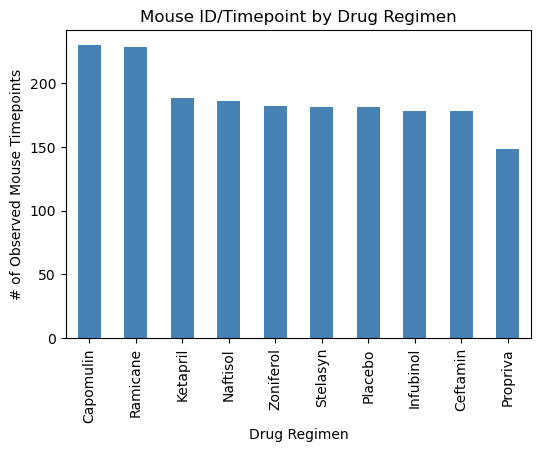

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

small_df = clean_df["Drug Regimen"].value_counts()         #I made a smaller dataframe in case I want to check the results for reasonableness 
figure1=small_df.plot(kind="bar", facecolor="steelblue", figsize=(6,4),
                        title = "Mouse ID/Timepoint by Drug Regimen",
                        xlabel="Drug Regimen",
                        ylabel="# of Observed Mouse Timepoints")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Placebo'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

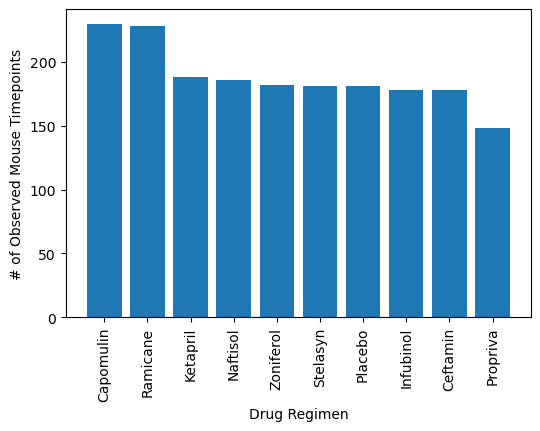

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
grouped = clean_df.groupby('Drug Regimen')    #created a smaller dataframe - easier to work with
grouped_data = grouped.count()

categories = grouped_data.index
values = grouped_data['Timepoint']

# Sort the data in descending order
sorted_data = sorted(zip(values, categories), reverse=True)
values, categories = zip(*sorted_data)

plt.figure(figsize=(6, 4))
plt.bar(categories, values)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)

<Axes: ylabel='Sex'>

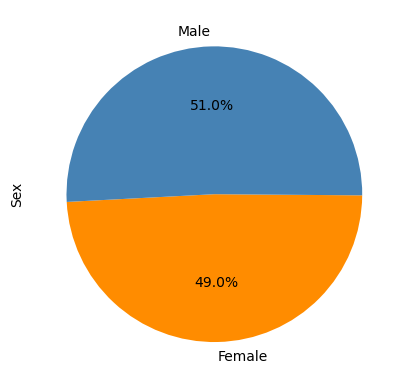

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
grouped = clean_df.groupby('Sex')

# count how many mice of each sex appears
grouped_data_counts = grouped['Sex'].count()
grouped_data_counts
colors = ['darkorange','steelblue']
grouped_data_counts.plot(kind='pie', colors=colors, autopct='%1.1f%%', startangle=183)

Text(0.0, 1.0, 'Sex')

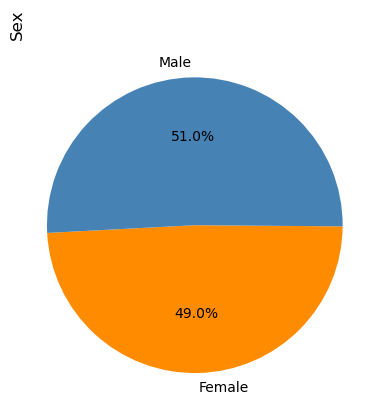

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
grouped = clean_df.groupby('Sex')
pie_labels=clean_df["Sex"].unique()
grouped_data_counts = grouped['Sex'].count()

colors = ['darkorange','steelblue']
plt.pie(grouped_data_counts, labels=pie_labels, colors=colors, autopct='%1.1f%%', startangle=183)
plt.title("Sex", loc='left', pad=-20, rotation=90, verticalalignment='center')

#NOTE: I haven't found documentation that indicates how to move the title to the center of the left side

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

grouped = clean_df.groupby(['Mouse ID'])["Timepoint"].max()    #this obtains the last timepoint for each mouse
grouped = grouped.reset_index()
#grouped

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_volume = pd.merge(grouped,clean_df, how='left', on=["Mouse ID","Timepoint"])
final_volume  # used this to chek the results of the merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

regimen_volume =[] 
#outliers = []

for drug in treatments:
     drug_data=final_volume[final_volume['Drug Regimen'] == drug]
     drug_volume=drug_data['Tumor Volume (mm3)']
     regimen_volume.append(drug_volume) 

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
     quartiles = drug_volume.quantile([.25,.5,.75])
     lowerq = quartiles[.25]
     upperq = quartiles[.75]
     IQR = upperq-lowerq
     lower_bound = lowerq - (1.5*IQR)
     upper_bound = upperq + (1.5*IQR)

    #calculate the outliers
     outliers=drug_volume.loc[(drug_volume <lower_bound) | (drug_volume > upper_bound)] 

    # now, print the outliers
     print(f"{drug}'s potential outliers: {outliers}")
    

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume (mm3)')

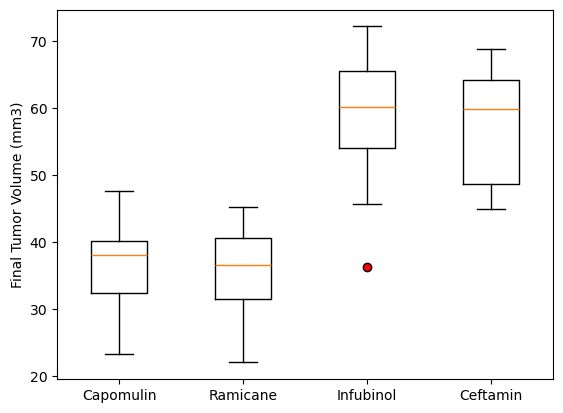

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(regimen_volume, patch_artist=False,flierprops=dict(markerfacecolor='red'))
ax1.set_xticklabels(treatments)
ax1.set_ylabel('Final Tumor Volume (mm3)')

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

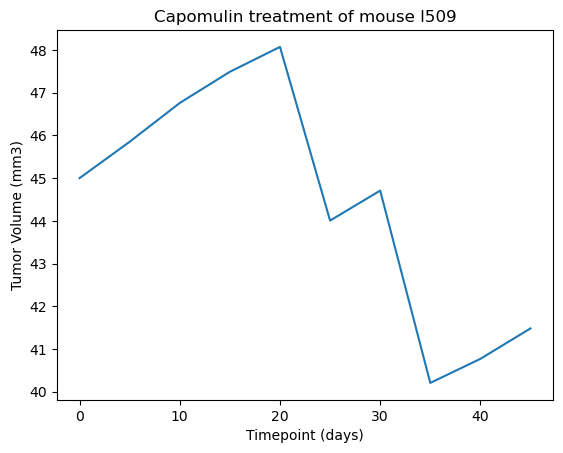

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"
mouse_data=clean_df[clean_df['Mouse ID'].str.contains(mouse_id, case=False)]
mouse_data
x_axis = np.arange(0,50,5)
x_axis
tumor_vol=mouse_data['Tumor Volume (mm3)']
tumor_vol
plt.plot(x_axis,tumor_vol)
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

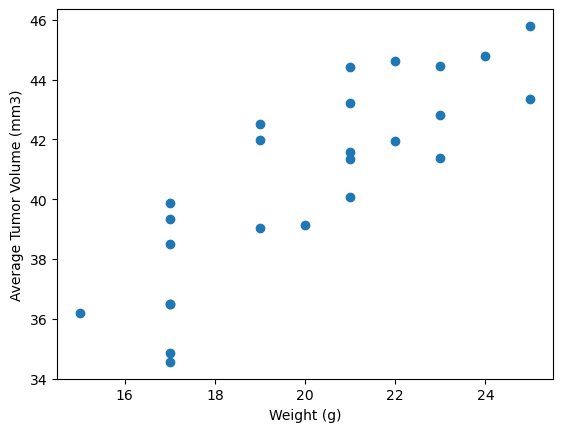

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_data=clean_df[clean_df['Drug Regimen'] == 'Capomulin']
Capomulin_data
Capomulin_data_new =Capomulin_data.groupby(["Mouse ID"])
Capomulin_avg=Capomulin_data_new[["Tumor Volume (mm3)","Weight (g)"]].mean()

plt.scatter(Capomulin_avg["Weight (g)"],Capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


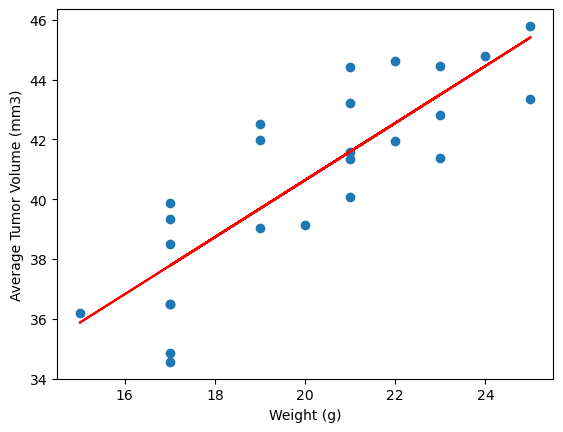

In [13]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
Capomulin_data=clean_df[clean_df['Drug Regimen'] == 'Capomulin']
Capomulin_data_new =Capomulin_data.groupby(["Mouse ID"])
Capomulin_avg=Capomulin_data_new[["Tumor Volume (mm3)","Weight (g)"]].mean()
#Capomulin_avg
plt.scatter(Capomulin_avg["Weight (g)"],Capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


correlation= st.pearsonr(Capomulin_avg["Weight (g)"], Capomulin_avg["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

weight = Capomulin_avg["Weight (g)"]
volume = Capomulin_avg["Tumor Volume (mm3)"]

# a new approach
model = st.linregress(Capomulin_avg["Weight (g)"],Capomulin_avg["Tumor Volume (mm3)"])
y_values = Capomulin_avg["Weight (g)"]*model[0] + model[1]
plt.plot(weight, y_values,color='red')